### Importing the libraries

The following python packages/libraries are used for data analysis, visualization and modelling.

- numpy
- pandas
- matplotlib
- seaborn
- sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.model_selection import KFold
import math

### Dataset Description

Here the breast-cancer dataset is used, which contains 683 rows or instances. There are 9 features with 1 target class which is binary - benign (0) and malignant (1). The column names are renamed for better understanding and convenience.

The following cells describes the summary of the data which includes the data type, statistic etc.

In [2]:
# Reading the csv
cancer_df = pd.read_csv('cancerdata.csv')

# Renaming column names for convenience.
col_names = ['clump_thickness', 'cell_size', 'cell_shape', 'marginal_adhesion', 'epith_c_size',
             'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

cancer_df.columns = col_names

# Displaying the first 10 rows
cancer_df.head(5)

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epith_c_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268,0
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268,0
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268,0
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0


In [3]:
# Information regarding statistic
cancer_df.describe()

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epith_c_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.349927
std,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,0.477296
min,1.193317,2.386095,2.295170,2.530536,1.688438,2.393815,1.704320,2.591299,3.199268,0.000000
25%,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,2.643212,2.591299,3.199268,0.000000
50%,3.639465,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0.000000
75%,5.270230,5.387585,5.373554,4.939281,4.792233,5.549811,5.459887,4.851618,3.199268,1.000000
max,8.531761,9.139446,9.221535,9.756771,10.999821,8.074609,10.154346,9.372257,15.146119,1.000000


In [4]:
# Dimension of the dataset
n_rows = cancer_df.shape[0]
n_cols = cancer_df.shape[1]

print("There are {} rows and {} columns.".format(n_rows, n_cols))

There are 683 rows and 10 columns.


### Data Preprocessing

This is a vital part as it improves the reliability as well as the accuracy of the dataset. Clean data of the highest quality is very important to make effective business decisions. The following operations are done to make the best use-case of our dataset before feeding it to our models.


#### Removing duplicate instances

Initially, there were 683 rows however after further analysis it is found that 234 rows are duplicate. The value for every feature/column is the same for each row, hence, they have to be removed. 

Duplicate data can ruin the splitting between the training & validation/testing sets. This means it won't be able to generalize better because the same data can be in both the sets.

After removing the duplicate values, the shape of the dataset is now (449, 10). 


#### Missing values

Missing values may skew the outcomes of the models, and also may lead to low accuracy. In this dataset there are no missing values, hence, perfectly clean.


#### Correlation

The reason we do this is to find the strength of the relationship between two continuous variables. In our demonstration we have used the Pearson's Correlation to find the coefficient between the variables. The values range from -1 to 1 where 

1 = highest positive related
-1 = highest negatively related &
0 = no correlation, whatsover

This can greatly help to identify highly correlated features and modify/combine where necessary.


#### Feature Engineering

It is the combination and transformation of the data to achieve a better accuracy and/or to reduce space/time complexity.

The 'cell_size' feature is removed since the correlation between this feature and the 'cell_shape' is 0.88 (88%) which is very high. We can say that both the features are somewhat alike, and keeping them together will only increase the space/time complexity of the algorithm, since they won't bring any new information.

#### Scaling | Normalization

During data preprocessing or preparation, the data is normalized or scaled for the model to understand the data better. Although, as we have seen above there is no significant difference in the values across the columns there was no need for scaling. However, in this coursework, it is still done using the MinMax Scaler. 

The MinMax Scaler normalizes the values from 0 to 1 by the following formula - 

    scaled_val_of_x = [x - min(x)] / [max(x) - min(x)]
    

#### Features and Labels

Lastly, the 449 rows are shuffled so that the data generalizes better.

The features and labels of the dataset are then being seperated where X (features) being the clump_thickness, cell_shape etc. and Y being the class (0/1).

After removing the duplicate rows, the new shape is (449, 10) 

Missing values

clump_thickness      0
cell_size            0
cell_shape           0
marginal_adhesion    0
epith_c_size         0
bare_nuclei          0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

After feature engineering, the new shape is (449, 9) 



,clump_thickness,cell_shape,marginal_adhesion,epith_c_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
39,1.000000,0.222222,0.000000,0.222222,0.222222,0.555556,0.444444,0.111111,1
534,0.666667,0.222222,0.666667,0.333333,0.444444,0.666667,0.777778,0.111111,1
24,0.444444,0.222222,0.333333,0.111111,0.666667,0.222222,0.555556,0.000000,1
126,0.777778,0.444444,0.333333,0.444444,1.000000,0.000000,0.555556,0.111111,1
451,1.000000,0.555556,0.111111,0.333333,1.000000,0.888889,0.666667,0.000000,1


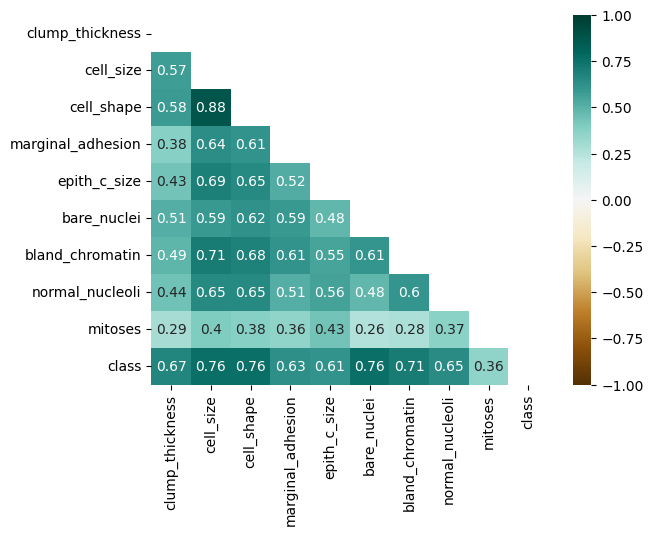

In [5]:
# Removing duplicate rows
dup_series = cancer_df.duplicated(keep='first')
cancer_df = cancer_df[~dup_series]
print('After removing the duplicate rows, the new shape is', cancer_df.shape, '\n')

# Calculating missing values
print('Missing values\n')
print(cancer_df.isna().sum())

# Finding correlation
cor_mask = np.triu(np.ones_like(cancer_df.corr()))
corr_heatmap = sns.heatmap(cancer_df.corr(), mask=cor_mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Feature Engineering
cancer_df = cancer_df.drop(['cell_size'], axis=1)

print('\nAfter feature engineering, the new shape is', cancer_df.shape, '\n')

# Scaling features
scaler = MinMaxScaler()
columns = list(cancer_df.drop(['class'], axis=1).columns)
cancer_df[columns] = scaler.fit_transform(cancer_df[columns])

# Shuffling the dataframe
cancer_df = cancer_df.sample(frac = 1)

# Splitting the features (X) and target var. i.e class (Y)
X = np.array(cancer_df.drop(['class'], axis=1))
y = np.array(cancer_df['class'])

# The new data
cancer_df.head(5)

## Classification Metrics

#### Confusion Matrix

At first, the confusion matrix is constructed to give the True Positive (TP), True Negative (TN), False Positive (FP) and the False Negative (FN) by comparing the true labelled values (y_test) with the predicted values (y_pred) which will come from our models - Naive Bayes and Logistic Regression.

- True-Positive (TP) : If it is cancerous/malignant (1), and the model correctly predicts '1'.
- True-Negative (TN) : Similarly, if it is benign (0), and the model correctly predicts '0'.
- False-Positive (FP) : If it is non-cancerous/benign (0) and the model incorrectly predicts it to be malignant or '1'.
- False-Negative (FN) : If it is cancerours/malignant (1) and the model incorrectly predicts it to be benign or '0'.

#### Metrics

After computing the TP, TN, FP and FN the following 6 metrics are calculated. These metrics will be used to compare the two models (Naive Bayes and Logistic Regression).

- Classification Accuracy : 

This is often termed as the 'validation accuracy', where the model correctly predicts the label (class) of the testing dataset (X_test). In this case, it is the number of correct classifications made by the model (TP + TN) divided by the total number.

        accuracy = (TP + TN) / (TP + TN + FP + FN)
    
- Precision : # of positive predictions made that are correct.

        precision = TP / (TP + FP)

- Recall : This is often termed as the 'sensitivity' of the data. This is the ratio of the '# of correctly predicted people which are cancerous' : 'Total # of cancerous patients'.

        recall = TP / (TP + FN)

- Specificity : # of negative predictions that are classified correctly.

        specificity = TN / (FP + TN)

- F1 Score : It is a measure where it combines both the recall and precision. This is a very important metric to compare the performance of the models.

        f1 score = (2 * recall * precision) / (precision + recall)

- ROC AUC Score : The ROC is a probability curve, whereas, the AUC is the degree of seperability. It tells how much a model is able to distinguish the classes (in our case it's 0 and 1). It is the rate of True Positive (TPR) against the rate of False Positive (FPR).

#### Functions

- <i> generate_conf_mat </i> : It takes in 2 parameters - y_test (i.e labels of the validation set) and y_pred (i.e predicted labels by the model) to generate the confusion matrix. 

- <i> calculate_metrics </i> : It takes in a lot of parameters such as TP, TN, FP etc. to calculate the classification metrics.

- <i> conf_mat_chart </i> : Generates a grouped bar chart to analyze the values of confusion matrix over the k-fold iterations.

- <i> generate_summary_charts </i> : Generate summary charts of F1 Score, Val Accuracy and ROC over 10 folds for both algorithms. (See Summary and Comparison Section)

- <i> get_results </i> : Prints the classification metrics for the model.

In [6]:
# Confusion Matrix
def generate_conf_mat(y_test, y_pred):
    
    mat = confusion_matrix(y_test, y_pred)

    TP = mat[0,0]
    TN = mat[1,1]
    FP = mat[0,1]
    FN = mat[1,0]
    
    return [TP, TN, FP, FN]

In [7]:
def calculate_metrics(TP, TN, FP, FN, X_test, y_test, model):
        
    # Metric 1 - Precision
    precision = TP / float(TP + FP)
    
    # Metric 2 - Recall
    recall = TP / float(TP + FN)
    
    # Metric 3 - Specificity
    spec = TN / float(TN + FP)
    
    # Metric 4 - F1 Score
    f1 = (2 * precision * recall)/(precision+recall)
    
    # Metric 5 - ROC AUC Score
    y_pred = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)
    
    return [precision, recall, spec, f1, roc_auc]

In [8]:
def conf_mat_chart(TP_, TN_, FP_, FN_, model_name, num_of_folds):
    
    idx = [x for x in range(1, num_of_folds+1)]
    
    df = pd.DataFrame({'True Positive': TP_,
                        'True Negative': TN_,
                          'False Positive' : FP_,
                      'False Negative': FN_}, index=idx)

    fig = df.plot.bar(color={"True Positive": "green", 
                                    "True Negative": "blue", "False Positive" : "red", 
                                  "False Negative" : "yellow"}, figsize = (10,4), title = str("Confusion Matrix of "+ model_name))
    
    
def generate_summary_charts(n, l, title ,num_of_folds):

    idx = [i for i in range(1, num_of_folds + 1)]
    df = pd.DataFrame({'Naive Bayes': n,
                            'Logistic Regression': l}, index= idx)

    fig = df.plot.bar(color={"Naive Bayes": "green", "Logistic Regression" : "blue"}, figsize = (10,4), title = title)

In [9]:
def get_results(metrics, model_name, num_of_folds):
        
    l_train_acc = []
    l_val_acc = []
    l_TP = []
    l_TN = []
    l_FP = []
    l_FN = []
    l_precision = []
    l_recall = []
    l_spec = []
    l_f1 = []
    l_roc_auc = []
    
    for i in metrics:
       
        l_train_acc.append(i[0])
        l_val_acc.append(i[1])
        l_TP.append(i[2])
        l_TN.append(i[3])
        l_FP.append(i[4])
        l_FN.append(i[5])
        l_precision.append(i[6])
        l_recall.append(i[7])
        l_spec.append(i[8])
        l_f1.append(i[9])
        l_roc_auc.append(i[10])        
        
    print('Classification Metrics for -', model_name)
    print('\n1. Training Accuracy:', np.mean(l_train_acc))
    print('2. Val. Accuracy', np.mean(l_val_acc))

    print('\nThere is no overfitting as the difference is low', 
          abs(np.mean(l_train_acc) - np.mean(l_val_acc)))

    print('\n3. Precision:', np.mean(l_precision))
    print('4. Recall:', np.mean(l_recall))
    print('5. Specificity:', np.mean(l_spec))
    print('6. F1:', np.mean(l_f1))
    print('7. ROC AUC:', np.mean(l_roc_auc))

    conf_mat_chart(l_TP, l_TN, l_FP, l_FN, model_name, num_of_folds)

## Models

In this coursework, two supervised machine learning algorithms - Naive Bayes (Gaussian) and Logistic Regression are compared for binary classification. A detailed comparative analysis of both the algorithms are done below.


### Model 1 - Naive Bayes

As the first model, the Naive Bayes is used which is a supervised classification machine learning algorithm. It's a probabilistic model, that's based upon the "Bayes Theorem". It assumes that the features are independent, in this case the 8 features (clump_thickness, cell_shape ....).

There are many types of Naive Bayes classifiers such as Multinomial, Bernouili and Gaussian. Here the Gaussian is used as it takes in continuous values rather than discrete ones. Although the pros are that the algorithm is easy to implement, however the con is it assumes the features are independent.

#### How does Gaussian Naive Bayes actually work?

1. At first, probability of P(Malignant) and P(Benign) is calculated for the training set.

2. The average and SD (standard deviation) is calculated for each of the feature (X) and a gaussian distribution is generated.

3. For each of the rows/instances of the testing set the likelihood is calculated, which will be used to determining the probability of the class. 

        malignant_prob = P(malignant) * P(clump_thickness | malignant) * P(cell_shape | malignant) .... etc.
    
        benign_prob = P(benign) * P(clump_thickness | benign) * P(cell_shape | benign) .... etc.
    
    
4. If the malignant_prob > benign_prob the predicted value will be '1', and '0' if it's the opposite.

### Model 2 - Logistic Regression

Like our first model, the logistic regression is also a supervised machine learning algorithm used for binary/multi-class classification. It is very much similar to linear regression, with an extra step i.e to feed it to the sigmoid function.

The sigmoid function can be written as -

    Sigmoid = 1/(1 + e^-z)
    
where z can be written as - 

    z = w1x1 + w2x2 + .... wnxn
    
& x1, x2, ... xn  which are the features (clump_thickness, cell_shape etc.), and w being the weights. After putting z in the sigmoid function, we will get a value ranging between 0 to 1. If the predicted value is less than the threshold value i.e 0.5, it's classified as a benign (0) and malignant(1) if the value is greater or equal to the threshold.

In [10]:
# This function is called by both the models by changing the parameter.
def classifier(X_train, X_test, y_train, y_test, model):
        
    # Fitting and Predicting
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating training and validation accuracy.
    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_test, y_test)

    # Calculating the metrics
    TP, TN, FP, FN = generate_conf_mat(y_test, y_pred)
    metrics = calculate_metrics(TP, TN, FP, FN, X_test, y_test, model)
    
    return [train_acc, val_acc, TP, TN, FP, FN, metrics[0], metrics[1], metrics[2], metrics[3], metrics[4]]

## Validation (K-Fold Cross Validation)

Unlike traditional splitting the dataset into training and testing (70%-30%) once, K-Fold Cross Validation does it k # of times. Here, the value of k is set to 10 meaning there will be 10 bins and each bin will contain same amount of data. Then the bin takes turns in becoming the test and the training sets.

After calculating the metrics for each iteration for both the models, the average is taken. It is to be noted while iterating the bins, the metrics of both the models are calculated simultaneously, meaning the same bin data is used for both. 

In the code snippet below, the metrics are appended to a list which are further manipulated in the 'get_results()' function above to generate the final result.

In [11]:
# K - Fold Cross Validation

model_1_name = "Naive Bayes"
model_1 = GaussianNB()

model_2_name = "Logistic Regression"
model_2 = LogisticRegression()

# K - Fold Cross Validation with 10 splits
num_of_folds = 10
k_f = KFold(n_splits = num_of_folds)

# List of metrics for the models
naive_metrics = []
log_metrics = []

# List for summary 
n_val_acc = []
n_f1 = []
n_roc_auc = []
lg_val_acc = []
lg_f1 = []
lg_roc_auc = []

for train_idx, test_idx in k_f.split(X):
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Naive Bayes
    n = classifier(X_train, X_test, y_train, y_test, model_1)    
    naive_metrics.append(n)
    
    #For comparison -----
    n_val_acc.append(n[1])
    n_f1.append(n[8])
    n_roc_auc.append(n[9])
    # ----------
    
    # Logistic Regression
    l = classifier(X_train, X_test, y_train, y_test, model_2)
    log_metrics.append(l)
    
    #For comparison -----
    lg_val_acc.append(l[1])
    lg_f1.append(l[8])
    lg_roc_auc.append(l[9])
    # -------------------

## Results

After doing the k-Fold Cross Validation, the mean of the metrics are taken into account. Furthermore, we can see the in the bar chart below the False Positive and False Negative of Logistic Regression is a bit lower than that of Naive Bayes.

### Naive Bayes

- Training accuracy: 0.9438
- Validation accuracy: 0.9443

Since the training accuracy is > 90% the model is not underfitted. Furthermore, the difference between them is insignificant therefore they are not overfitted.

- Precision: 0.92
- Recall or Sensitivity: 0.96
- Specificity: 0.93
- F1 Score: 0.93
- ROC AUC Score: 0.98


### Logistic Regression

- Training accuracy: 0.9554
- Validation accuracy: 0.9487

Similarly, since the logistic regression is neither overfitted or underfitted.

- Precision: 0.94
- Recall or Sensitivity: 0.94
- Specificity: 0.95
- F1 Score: 0.94
- ROC AUC Score: 0.99

Classification Metrics for - Naive Bayes

1. Training Accuracy: 0.9438259381493703
2. Val. Accuracy 0.9443939393939393

There is no overfitting as the difference is low 0.0005680012445690164

3. Precision: 0.920557280883368
4. Recall: 0.9605595427963849
5. Specificity: 0.9315168728212206
6. F1: 0.9392969867969867
7. ROC AUC: 0.9852796506588778

--------------------------------------------------------------------------

Classification Metrics for - Logistic Regression

1. Training Accuracy: 0.9554565456545653
2. Val. Accuracy 0.9487878787878788

There is no overfitting as the difference is low 0.006668666866686435

3. Precision: 0.9481245686680468
4. Recall: 0.9429052704224329
5. Specificity: 0.9538012913012913
6. F1: 0.9450567381534078
7. ROC AUC: 0.9918543679258656


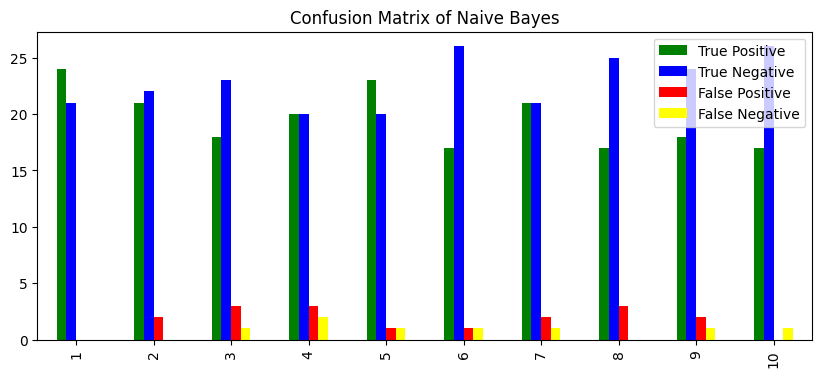

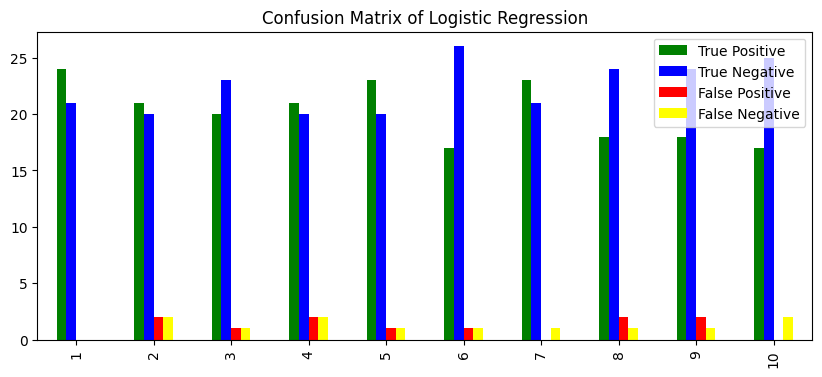

In [12]:
# Results for Naive Bayes
get_results(naive_metrics, model_1_name, num_of_folds)

print('\n--------------------------------------------------------------------------\n')

# Results for Logistic Regression
get_results(log_metrics, model_2_name, num_of_folds)

### Summary and Comparison 

Both the models performs very well for this cancer dataset. However, Logistic Regression does a bit better in the following ways -

##### Validation Accuracy
The validation accuracy of Logistic Regression performs a bit better than the Naive Bayes, meaning it predicted the samples of the testing set better.

##### F1 Score
This is a very important metric to compare models, as it itself summarizes a lot of the other metrics. Here, too the Logistic Regression does a better job than the Naive Bayes.

##### ROC AUC
Similarly, the ROC AUC score of the Logistic Regression is bit better than that of Naive Bayes, meaning it can classify and distinguish the benign and malignant class better.

**Refer to the bar-chart where it compares for each k-fold below.

To conclude, due to the small size of the dataset it is very had to compare models and justify whether one is better than the other. But if I were to choose one model, I would go for the Logistic Regression.

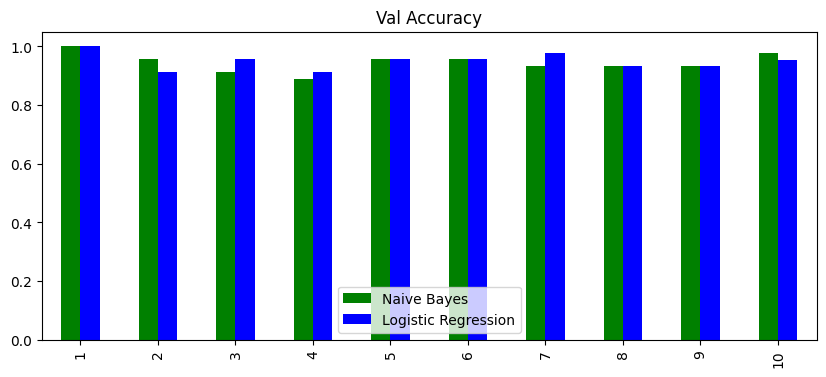

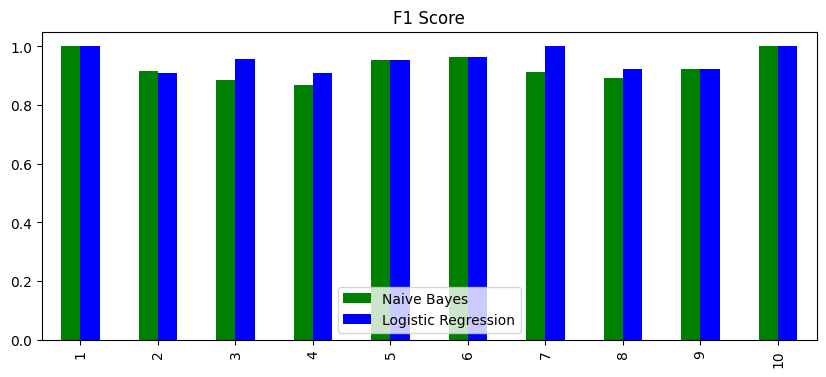

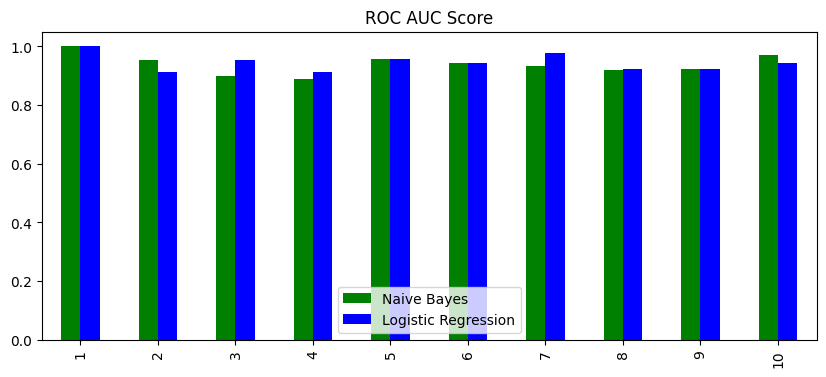

In [13]:
# Comparison for Validation Accuracy
generate_summary_charts(n_val_acc, lg_val_acc, "Val Accuracy" ,num_of_folds)

# Comparison for F1 Score
generate_summary_charts(n_f1, lg_f1, "F1 Score" , num_of_folds)

# Comparison of ROC AUC Score
generate_summary_charts(n_roc_auc, lg_roc_auc, "ROC AUC Score" ,num_of_folds)